In [1]:
from scipy import *
import numpy as np
import WLanalysis

In [31]:
####### check z=1 galaxies
folder='plots/output_eb_5000_s4/'
PDFcmb = mean(load(folder+'ALL_cmb_pdf_1.0.npy'),axis=0)
PDFgal = mean(load(folder+'ALL_gal_pdf_1.0_0.5.npy'),axis=0)

PScross = mean(load(folder+'ALL_cmbXcmb.npy'),axis=0)
PDF2d = mean(load(folder+'ALL_galXcmb_2dpdf_1.5_0.5_1.0.npy'),axis=0)

PDF2d_noiseless = mean(load(folder+'ALL_igalXicmb_2dpdf_1.5_0.5_1.0.npy'),axis=0)

In [32]:
print PDFcmb.shape, PDFgal.shape, PScross.shape, PDF2d.shape
ell = linspace(100, 3000, 19)

(80,) (80,) (20,) (60, 80)


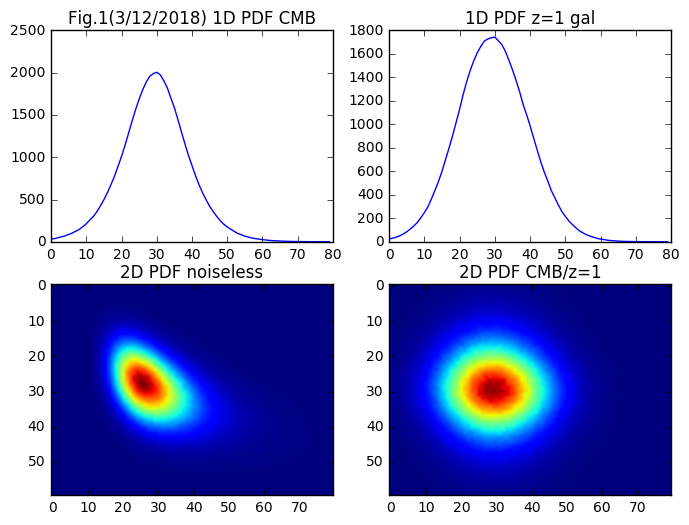

In [33]:
f, ((ax1,ax2),(ax3,ax4))=subplots(2,2,figsize=(8,6))
ax1.plot(PDFcmb)
ax2.plot(PDFgal)
#ax3.plot(ell,PScross*ell)
ax3.imshow(PDF2d_noiseless)
ax4.imshow(PDF2d)#contour(PDF2d)
ax1.set_title('Fig.1(3/12/2018) 1D PDF CMB')
ax2.set_title('1D PDF z=1 gal')
ax3.set_title('2D PDF noiseless')
#ax3.set_ylabel('ell*Cell')
ax4.set_title('2D PDF CMB/z=1')
show() # (n**2 + n)/2 = n(n+1)/2

In [ ]:
### generate average stats, on stampede2
# ALL_fn = genfromtxt('ALL_fn.txt',dtype='string')
# fn_list = genfromtxt('cosmo_params_all.txt',usecols=1, dtype='string')
# fnjia_list = genfromtxt('cosmo_params_all.txt',usecols=0, dtype='string')
# stats_fn = lambda iALL, ieb, icosmo: '/scratch/02977/jialiu/peakaboo/stats/'+icosmo+'/1024b512/'+ieb+'/'+iALL
# stats_dir = '/scratch/02977/jialiu/peakaboo/stats_avg/'
# for i in range(len(fn_list)):
#     icosmo = fn_list[i]    
#     os.system('mkdir -pv %s%s'%(stats_dir, icosmo))
#     for ieb in ['output_eb_5000_s4','output_tt_3000_s4']:        
#         for iALL in ALL_fn:
#             out_fn = stats_dir+'%s/%s_%s'%(icosmo, ieb, iALL)
#             print out_fn
#             out = mean(load(stats_fn(iALL, ieb, icosmo)),axis=0)
#             save(out_fn, out)